# Week 1 - day 1
## **Warm up Exercise**

### load packages

In [1]:
import numpy as np
from scipy import signal
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.cbook as cbook 
import matplotlib.image as image 

### load image

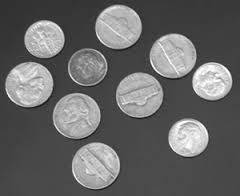

(240, 196) RGB
(240, 196) F


In [2]:
img_filename = './imgs/coins.png'
with Image.open(img_filename) as img:
    img.show()  # display the image, you may also use display(img),这个函数会打开一个窗口
    display(img) #这个函数直接在下面显示
    print(img.size, img.mode)  # print the info of the image
    img_g = img.convert('F') #将img转化为f模式
    print(img_g.size, img_g.mode)
    img_arr = np.array(img_g)

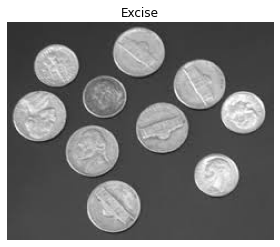

(196, 240, 3)
<class 'numpy.ndarray'>


In [7]:
img_array=plt.imread(img_filename,0)#将图像文件读取为ndarray
#如果不加参数0，就会报错，原因是读取png时，没有alpha通道
plt.imshow(img_array)
plt.axis('off')#删除轴
plt.title('Excise')
plt.show()
print(img_array.shape)
print(type(img_array))

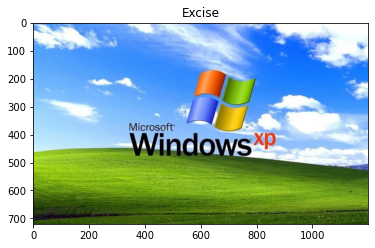

(720, 1200, 3)


In [3]:
img_array=plt.imread('./imgs/windows-xp.jpg')
#如果不加参数0，就会报错，原因是读取png时，没有alpha通道
plt.imshow(img_array)
plt.title('Excise')
plt.show()
print(img_array.shape)


### Convolutions

#### 1. Construct a filter kernel used for blurring

In [4]:
# Construct a filter kernel used for blurring
mean_kernel = np.ones((11, 11)) / (11*11)

In [5]:
# convolution 
mean_arr = signal.convolve2d(img_arr, mean_kernel, mode='same', boundary='symm') # Q: how do the parameter 'mode' and 'boundary' make a difference?

In [6]:
print('Shape of original:  ', img.size)
print('Shape of convolved: ', mean_arr.shape)

Shape of original:   (240, 196)
Shape of convolved:  (196, 240)


Text(0.5, 0, 'image after convolution')

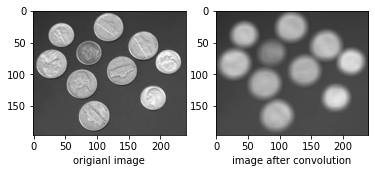

In [7]:
# Display the results
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
axs[0].set_xlabel('origianl image')
axs[1].imshow(mean_arr, cmap='gray', vmin=0, vmax=255)
axs[1].set_xlabel('image after convolution')

#### 2. Construct a filter kernel used for sharpening

In [44]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
print(sharpen_kernel)

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


In [35]:
# Convolution
sharpen_arr = signal.convolve2d(img_arr, sharpen_kernel, mode='same', boundary='symm')

In [39]:
print('Shape of original:  ', img.size)
print('Shape of convolved: ', sharpen_arr.shape)

Shape of original:   (240, 196)
Shape of convolved:  (196, 240)


Text(0.5, 0, 'image after convolution')

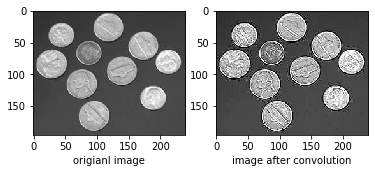

In [38]:
# Display the results
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
axs[0].set_xlabel('origianl image')
axs[1].imshow(sharpen_arr, cmap='gray', vmin=0, vmax=255)
axs[1].set_xlabel('image after convolution')

#### 3. Try some other kernels?

In [25]:
scharr_kernel = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]])

In [26]:
scharr_arr = signal.convolve2d(img_arr, scharr_kernel, mode='same', boundary='symm')

In [40]:
print('Shape of original:  ', img.size)
print('Shape of convolved: ', scharr_arr.shape)

Shape of original:   (240, 196)
Shape of convolved:  (196, 240)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


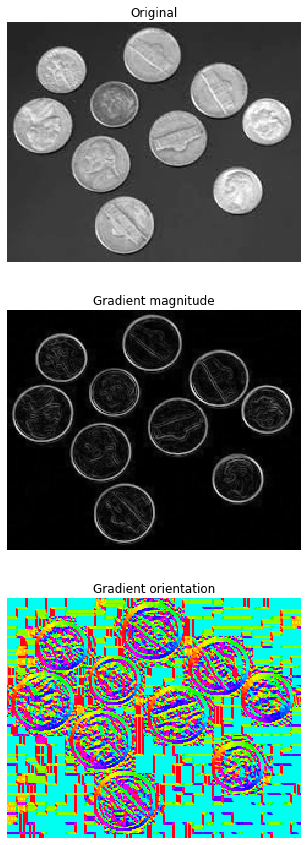

In [31]:
# Display the results
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(6, 15))
ax_orig.imshow(img_arr, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()

ax_mag.imshow(np.absolute(scharr_arr), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()

ax_ang.imshow(np.angle(scharr_arr), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()
fig.show()

#### 3. gauss_kernel

In [41]:
def creat_gauss_kernel(kernel_size=3, sigma=1, k=1):
    if sigma == 0:
        sigma = ((kernel_size - 1) * 0.5 - 1) * 0.3 + 0.8
    X = np.linspace(-k, k, kernel_size)
    Y = np.linspace(-k, k, kernel_size)
    x, y = np.meshgrid(X, Y)
    x0 = 0
    y0 = 0
    gauss = 1/(2*np.pi*sigma**2) * np.exp(- ((x -x0)**2 + (y - y0)**2)/ (2 * sigma**2))
    return gauss


In [45]:
gauss_kernel=creat_gauss_kernel()

[[0.05854983 0.09653235 0.05854983]
 [0.09653235 0.15915494 0.09653235]
 [0.05854983 0.09653235 0.05854983]]


numpy.ndarray

In [46]:
gauss_arr = signal.convolve2d(img_arr, gauss_kernel, mode='same', boundary='symm')

In [47]:
print('Shape of original:  ', img.size)
print('Shape of convolved: ', gauss_arr.shape)

Shape of original:   (240, 196)
Shape of convolved:  (196, 240)


Text(0.5, 0, 'image after convolution')

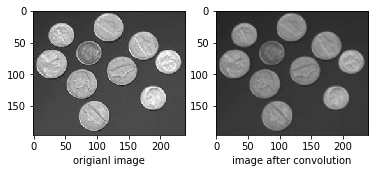

In [48]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
axs[0].set_xlabel('origianl image')
axs[1].imshow(gauss_arr, cmap='gray', vmin=0, vmax=255)
axs[1].set_xlabel('image after convolution')

## **Task 1**

#### Thresholding
Use the operators >, <, >=, <= to threshold the image using an arbitrary threshold. 

That is, divide the image pixels into two classes, the ones below and the ones above the threshold, 

and give them different values (e.g. 0 and 255)

In [26]:
# TODO 
THRE=80
img_thre= img_arr > THRE

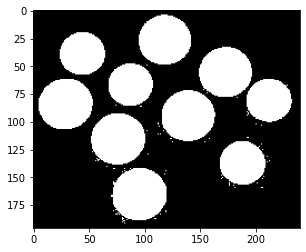

In [27]:
# display the result
plt.imshow(img_thre, cmap='gray')
img_thre = img_thre.astype(int)

### **Think:** why the segmentation can be so easily implemented simply by thresholding? 
try plot the histogram of the image, you will understand.

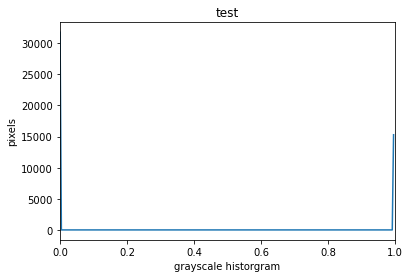

In [17]:
histogram,bin_edges=np.histogram(img_thre,bins=256,range=(0.0,1.0))
plt.plot(bin_edges[0:-1],histogram)
plt.title("test")
plt.xlabel("grayscale historgram")
plt.ylabel("pixels")
plt.xlim(0,1.0)
plt.show()

## **Task 2**

### Use the methods in Pillow to implement 
https://pillow.readthedocs.io/en/stable/handbook/index.html
1. vertically flipped
2. horizontally flipped
3. rotated by 90 degrees

In [28]:
# load and display image
img_filename = './imgs/windows-xp.jpg'
with Image.open(img_filename) as img_obj:
    img_obj.show()  # display the image, you may also use display(img)


In [31]:
# 1. vertically flipped
# TODO
verti_flipped=img_obj.transpose(Image.FLIP_TOP_BOTTOM)
verti_flipped.show()

In [30]:
# 2. horizontally flipped
# TODO
hori_flipped=img_obj.transpose(Image.FLIP_LEFT_RIGHT)
hori_flipped.show()

In [33]:
# 3. rotated by 90 degrees
# TODO
rotated90=img_obj.transpose(Image.ROTATE_90)
rotated90.show()

## **Task 3**
#### Implement the **function swap_RB()** where:
+ In the returned image BGR the red and blue channels of the input image have to be swapped.
+ You can carry out the operation using arraying indexing or with loops

In [12]:
def swap_RB(filename):
    # load and display image
    with Image.open(filename) as img_obj:
        img_obj.show()  # display the image, you may also use display(img)
        print(img_obj.mode) 
    # TODO
   

In [ ]:
# test the function
img_filename = './imgs/windows-xp.jpg'
swap_RB(img_filename)